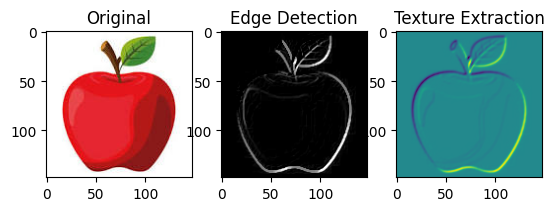

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('fru.jpeg')
image_mat= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)       # orignal img
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

edges_x = cv2.filter2D(gray_image, -1, sobel_x)
edges_y = cv2.filter2D(gray_image, -1, sobel_y)

edges = cv2.addWeighted(edges_x, 0.5, edges_y, 0.5, 0)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)          # To find edges_rgb we need sobel_x_y and edges_x_y


sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
texture=sobelx+sobely                                        # To find texture we need sobelx and sobely

l_title=["Original","Edge Detection","Texture Extraction"]
l_var=[image_mat,edges_rgb,texture]

fig,axs=plt.subplots(1,3)
for i in range(3):
    axs[i].imshow(l_var[i])
    axs[i].set_title(l_title[i])


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


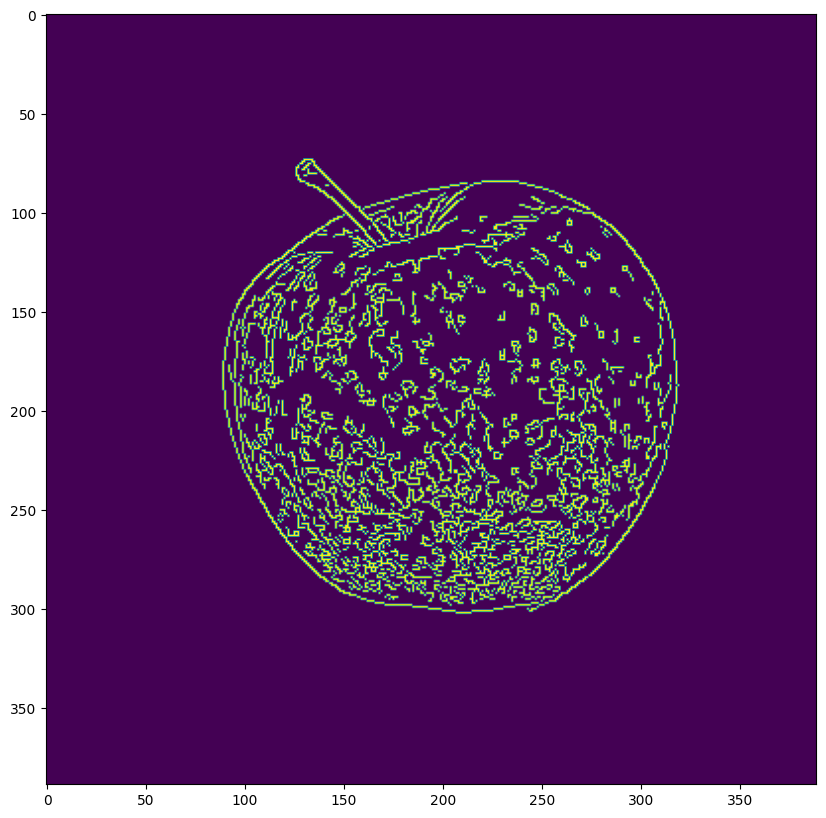

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,10))

#edges
img = cv.imread("fru.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(img,threshold1=100, threshold2=200)
plt.imshow(edges)

#Feature corner
import numpy as np
img = cv.imread("Images/chessboard.png")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_grayf = np.float32(img_gray)
dest = cv.cornerHarris(img_grayf, 2,3,0.02)
dest = cv.dilate(dest,None)
threshold = 0.01*dest.max()
img[dest> threshold] = [0,0,255]
plt.imshow(img)